In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [3]:
#load the dataframe and set column name
df=pd.read_csv('./amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [4]:
df.shape

(7824482, 4)

In [5]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [6]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [7]:
# electronics_data=df

In [8]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [9]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,AILFCO0B2MDD2,B00169TADM,5.0,1281398400
1,A390IMYUC16XR7,B000J45BK6,5.0,1335657600
2,A3EXOCHTIR7Z36,B0014175E8,5.0,1233878400
3,A3HNXYTN1EZJ2V,B00478O0JI,5.0,1360368000
4,A3OY2H8KUGDRZW,B003XQLRQY,5.0,1401148800


In [10]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [11]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [12]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012649e+00
std,1.381085e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [13]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [14]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [15]:
electronics_data.head()

,userId,productId,rating
0,AILFCO0B2MDD2,B00169TADM,5.0
1,A390IMYUC16XR7,B000J45BK6,5.0
2,A3EXOCHTIR7Z36,B0014175E8,5.0
3,A3HNXYTN1EZJ2V,B00478O0JI,5.0
4,A3OY2H8KUGDRZW,B003XQLRQY,5.0


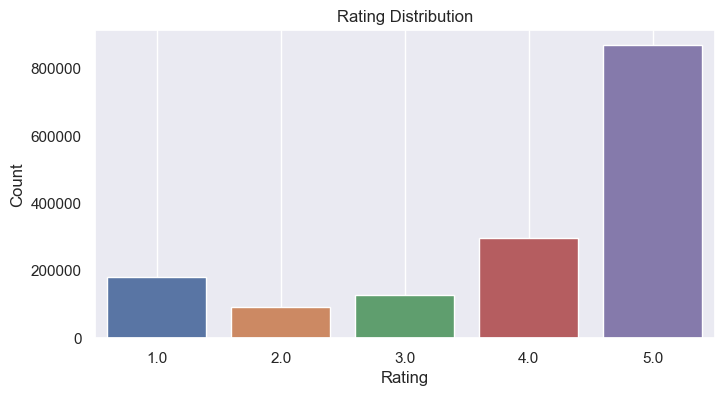

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [17]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225427
Total unique products :  237805


analyzing the rating by user

In [18]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A3OXHLG6DIBRW8    114
A5JLAU2ARJ0BO     110
ADLVFFE4VBT8      108
A680RUE1FDO8B      94
A6FIAB28IS79       88
Name: rating, dtype: int64

In [19]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 23 


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [20]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [21]:
data.head()

,userId,productId,rating
1,A390IMYUC16XR7,B000J45BK6,5.0
2,A3EXOCHTIR7Z36,B0014175E8,5.0
3,A3HNXYTN1EZJ2V,B00478O0JI,5.0
6,A2ZZ8Z39Y3V97U,B002EOUUAK,1.0
7,A2QP611M7S77XY,B0047E8DN6,5.0


In [22]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [23]:
no_of_rating_per_product.head()

productId
B0074BW614    3665
B00DR0PDNE    3280
B007WTAJTO    2738
B0019EHU8G    2497
B006GWO5WK    2476
Name: rating, dtype: int64

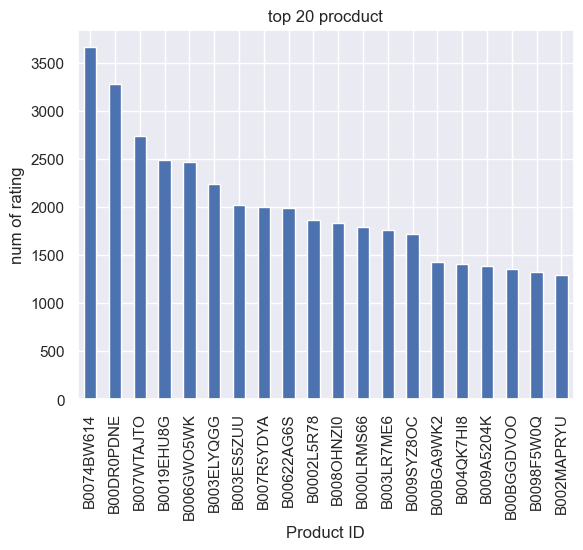

In [24]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [25]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [26]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.375000
1400501466,3.644068
1400532655,3.795181
140053271X,3.814815
B00000DM9W,4.395062


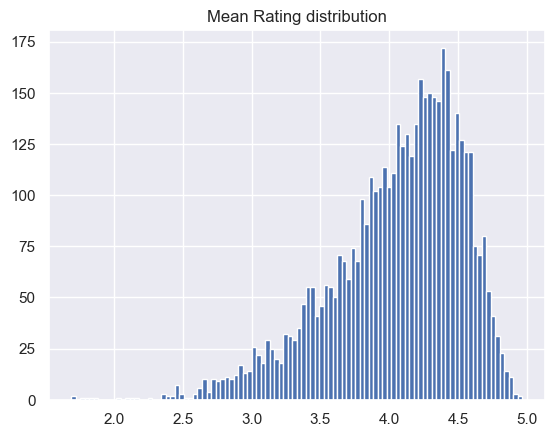

In [27]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [28]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9367161232614518

In [29]:
#it is highly negative skewed

In [30]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [31]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.375000,192
1400501466,3.644068,59
1400532655,3.795181,83
140053271X,3.814815,81
B00000DM9W,4.395062,81


In [32]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.498499,3665


In [33]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  100


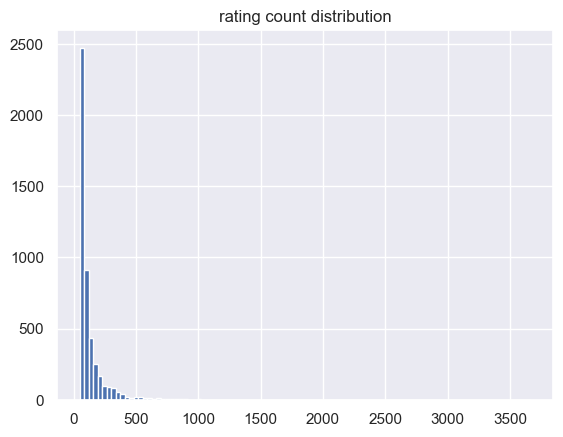

In [34]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

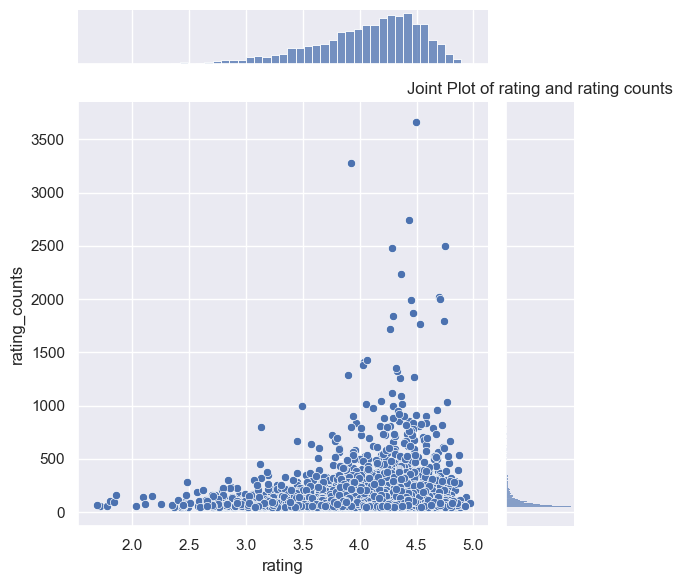

In [35]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

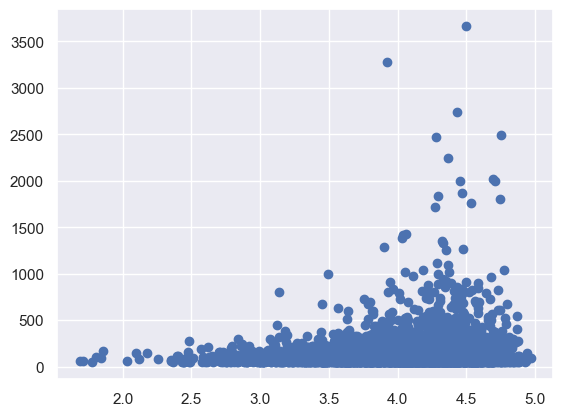

In [36]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [37]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11448607104675931 


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [38]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

surprise is already installed.


In [39]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [40]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [41]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [42]:
#make prediction using testset
test_pred=algo.test(testset)

In [43]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3077


1.3076991955688586

**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [44]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400532655,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000K2YR,B00001OWYM,B00001P4XA,...,B00HVLUR86,B00HWSXVDG,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IT1WJZQ,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A00181602D9AWTFS65LFO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0024936S1WI02OHH9DP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0031098122VW82698OGB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A015639027WKW2102QO0S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02281012YV88MF40PIPJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [45]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19880, 4377)

In [46]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00181602D9AWTFS65LFO,A0024936S1WI02OHH9DP,A0031098122VW82698OGB,A015639027WKW2102QO0S,A02281012YV88MF40PIPJ,A03048481FV621E1W2HAT,A0355765350LODO7BJV3A,A04137101Q4LZ5CB42S6U,A04302382BESVS0NAJOEC,A05438523W0DXA75JNLO,...,AZXOVQHU9901G,AZYMH3ZDZML7C,AZZ1QIEWIUC1G,AZZ556B2VPA1C,AZZFMZYUBRJDA,AZZJ8YOS590LR,AZZMRAY3BHVN8,AZZNY7VTX96F4,AZZTC2OYVNE2Q,AZZX23UGJGKTT
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x_ratings_matrix.shape

(4377, 19880)

In [48]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4377, 10)

In [49]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4377, 4377)

In [50]:
x_ratings_matrix.index[10]

'B00001P4ZH'

In [51]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

10


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [52]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4377,)

In [53]:
correlation_matrix[correlation_product_ID>0.75].shape

(220, 4377)

In [54]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4ZH',
 'B00005A1KZ',
 'B00005N6KG',
 'B000067RVL',
 'B00006HSML',
 'B00006JQ06',
 'B00007E7JU',
 'B00008VWOJ',
 'B0000A1G05',
 'B0000UV2AW',
 'B0001A3N6C',
 'B0001F22PA',
 'B0001VGFKW',
 'B0002EXJ8Y',
 'B0002U1TJY',
 'B0002Y5WZC',
 'B0007VPFI4',
 'B00080YK9Y',
 'B000812QC6',
 'B0009NEUO0']